In [21]:
import random
import matplotlib.pyplot as plt
import math
import sys
from scipy.stats import bernoulli

# Le problème du voyageur de commerce

In [22]:
points = []
with open("RS/16.tsp", "r") as f:
    for line in f:
        line_list = line.strip().split(" ")
        points.append([float(line_list[0]), float(line_list[1]), float(line_list[2])])

In [23]:
def total_distance(path):
    dist_total = 0
    for i in range(len(path)):
        if i != len(path) - 1:
            dist_total += math.sqrt(pow(path[i][1] - path[i + 1][1],2) + pow(path[i][2] - path[i + 1][2], 2))
        else:
            dist_total += math.sqrt(pow(path[i][1] - path[0][1], 2) + pow(path[i][2] - path[0][2], 2))
    return(dist_total)

In [24]:
def algo_naif(points):
    dist_min = sys.maxsize
    path_min = []
    for i in range(1000 * len(points)):
        path = random.sample(points, len(points))
        dist_total = total_distance(path)
        if(dist_total < dist_min):
            dist_min = dist_total
            path_min = path.copy()
    return(path_min)

In [25]:
def disturbance(path):
    neighbor = path.copy()
    [indice1, indice2] = random.sample(range(len(neighbor)), 2)
    tmp = neighbor[indice1]
    neighbor[indice1] = neighbor[indice2]
    neighbor[indice2] = tmp
    return(neighbor)

In [26]:
def lahc(path, n_mem):

    path_min = path.copy()

    dist_min = total_distance(path_min)
    print()

    memory = []
    for i in range(n_mem):
        memory.append(dist_min)

    convergence_value_min = []

    cpt = 1

    while cpt < 2000:

        dist_mem = memory[cpt % n_mem]
        neighbor = disturbance(path)
        dist_neighbor = total_distance(neighbor)

        if dist_neighbor < dist_mem :
            path = neighbor.copy()

        memory[cpt % n_mem] = dist_neighbor

        if dist_neighbor < dist_min:
            path_min = neighbor.copy()
            dist_min = dist_neighbor

        convergence_value_min.append(dist_min)

        cpt += 1

    return(path_min, dist_min, convergence_value_min)






77.28802133695112


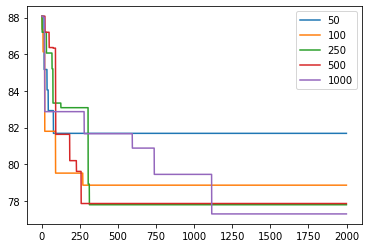

In [27]:
path = algo_naif(points)

path_min1, dist_min1, convergence_value_min1 = lahc(path, 100)

path_min2, dist_min2, convergence_value_min2 = lahc(path, 500)

path_min3, dist_min3, convergence_value_min3 = lahc(path, 1000)

path_min4, dist_min4, convergence_value_min4 = lahc(path, 5000)

path_min5, dist_min5, convergence_value_min5 = lahc(path, 10000)

plt.plot(range(1, 2000), convergence_value_min1, label='50')
plt.plot(range(1, 2000), convergence_value_min2, label='100')
plt.plot(range(1, 2000), convergence_value_min3, label='250')
plt.plot(range(1, 2000), convergence_value_min4, label='500')
plt.plot(range(1, 2000), convergence_value_min5, label='1000')

print(min(dist_min1, dist_min2, dist_min3, dist_min4, dist_min5))

plt.legend()

plt.show()

## Comparaison des deux algos

In [28]:
res_lahc = []
path = algo_naif(points)
for i in range(30):
    path_min, dist_min, convergence_value_min = lahc(path.copy(), 500)
    res_lahc.append(dist_min)

In [29]:
def metropolisCriteria(delta, t):
    if(delta < 0):
        res = True
    else :
        res_prob = bernoulli.rvs(math.exp(-delta/t))
        res = (res_prob == 1)
    return(res)

In [30]:
def cooling(alpha, t):
    return(alpha*t)

In [31]:
def recuit_simule(path, t):

    dist = total_distance(path)
    path_min = path
    dist_min = dist

    cpt = 1

    convergence_value_min = []

    while cpt < 2000:

        cpt_without_improvement = 1
        improved = False

        while cpt_without_improvement < 100 and not improved:

            neighbor = disturbance(path)
            dist_neighbor = total_distance(neighbor)
            delta = dist_neighbor - dist

            if metropolisCriteria(delta, t):

                path = neighbor
                dist = dist_neighbor
                
                if delta > 0 and dist_neighbor < dist_min:

                    dist_min = dist_neighbor
                    path_min = neighbor
                    improved = True
            
            cpt_without_improvement += 1
        
        cpt += 1

        t = cooling(0.99, t)

        convergence_value_min.append(dist_min)
    
    return(path_min, dist_min, convergence_value_min)

In [35]:
res_recuit = []
path = algo_naif(points)
for i in range(30):
    path_min, dist_min, convergence_value_min = recuit_simule(path.copy(), 10000)
    res_recuit.append(dist_min)

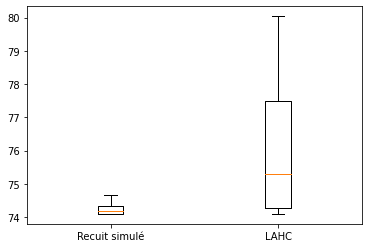

In [37]:
plt.boxplot([res_recuit, res_lahc], labels=["Recuit simulé", "LAHC"], showfliers=False)
plt.show()